In [1]:
from optimization import SGDClassifier

In [16]:
def launch_SGDC(data_info, batch_size, step_alpha = 1, step_beta = 0, max_iter = 1000, trace = False, w_0 = None):
    classifier = SGDClassifier(batch_size, step_alpha = step_alpha, step_beta = step_beta, max_iter = max_iter, l2_coef = 0)
    holder = classifier.fit(data_info[0][0], data_info[0][1], trace = trace, w_0 = w_0)
    result = classifier.predict(data_info[1][0])
    
    return holder, result

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import re

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def check_metrics(true_val, pred_val):
    print("Accuracy: ", accuracy_score(true_val, pred_val))
    print("Roc_Auc: ", roc_auc_score(true_val, pred_val))
    print("Precision: ", precision_score(true_val, pred_val), " - процент правильно токсичных")
    print("Recall: ", recall_score(true_val, pred_val), " - процент выбранных токсичных")

data = pd.read_csv("toxic_train.csv")

test_data = pd.read_csv("toxic_test.csv")


train_texts = np.array(data['comment_text'])
test_texts = np.array(test_data['comment_text'])

for enum in range(train_texts.__len__()):
    train_texts[enum] = train_texts[enum].lower()
    train_texts[enum] = re.sub("[^0-9a-zA-Z]+", ' ', train_texts[enum])
    train_texts[enum] =  re.sub(' +', ' ', train_texts[enum])


    
test_texts = np.array(test_data['comment_text'])
for enum in range(test_texts.__len__()):
    test_texts[enum] = test_texts[enum].lower()
    test_texts[enum] = re.sub("[^0-9a-zA-Z]+", ' ', test_texts[enum])
    test_texts[enum] =  re.sub(' +', ' ', test_texts[enum])


train_target = np.array(data['is_toxic']).astype(int) * 2 - 1 
test_target = np.array(test_data['is_toxic']).astype(int) * 2 - 1



In [5]:
 def predict(X, w):

    ans = np.sign(X * w)
    ans[ans == 0] = 1
    return ans

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
vect = CountVectorizer(min_df=20, stop_words='english')

In [8]:
train_matrix = vect.fit_transform(train_texts)
test_matrix = vect.transform(test_texts)

In [9]:
data_system = ((train_matrix, train_target), (test_matrix, test_target))

In [10]:
from joblib import Parallel, delayed, parallel_backend

In [109]:
parallel = Parallel(4)

In [114]:
classifier = SGDClassifier(batch_size = 8000, step_alpha = 8, step_beta = 0, l2_coef = 0)

In [115]:
classifier.fit(train_matrix, train_target)

In [116]:
accuracy_score(test_target, classifier.predict(test_matrix))

0.8663184368349778

0.003756317545580001

Batch_size:

In [17]:
data_batch = parallel(delayed(launch_SGDC)(data_system, i * 1000, 2.6, 0, 200, True) for i in range(1, 50))

In [18]:
results = [item[1] for item in data_batch]
holds = [item[0] for item in data_batch]

In [19]:
accuracy_batch = [accuracy_score(test_target, result) for result in results]

In [44]:
max(accuracy_batch)

0.866560263106984

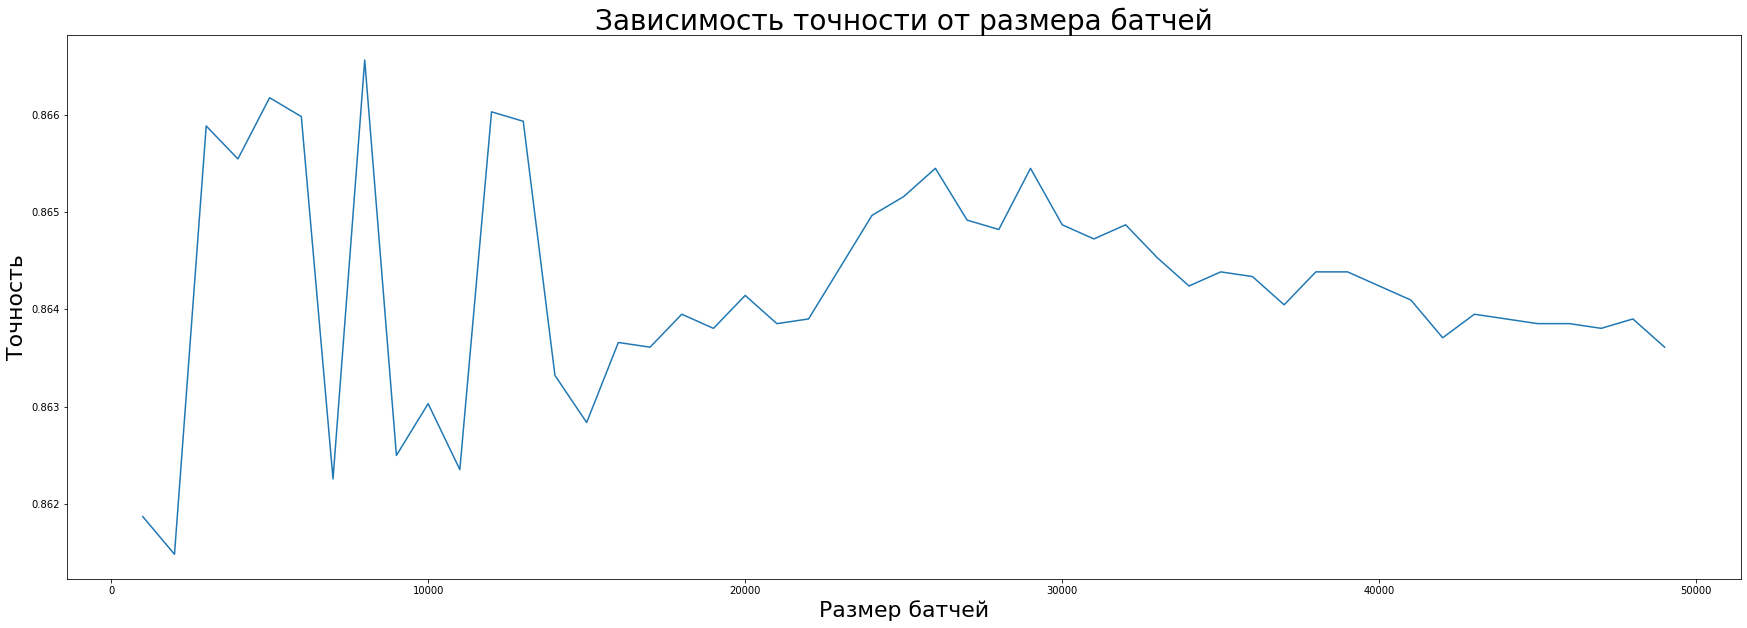

In [22]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.arange(1, 50) * 1000, accuracy_batch)
plt.title("Зависимость точности от размера батчей", fontsize=28)
plt.xlabel("Размер батчей", fontsize=22)
plt.ylabel("Точность", fontsize=22)

plt.savefig("Images/sgd_batch_size.png")

plt.show()

In [37]:
times = [np.sum(holds[i]['time']) for i in range(0, 49)]

In [38]:
[np.sum(holds[i]['time']) for i in range(49)].__len__()

49

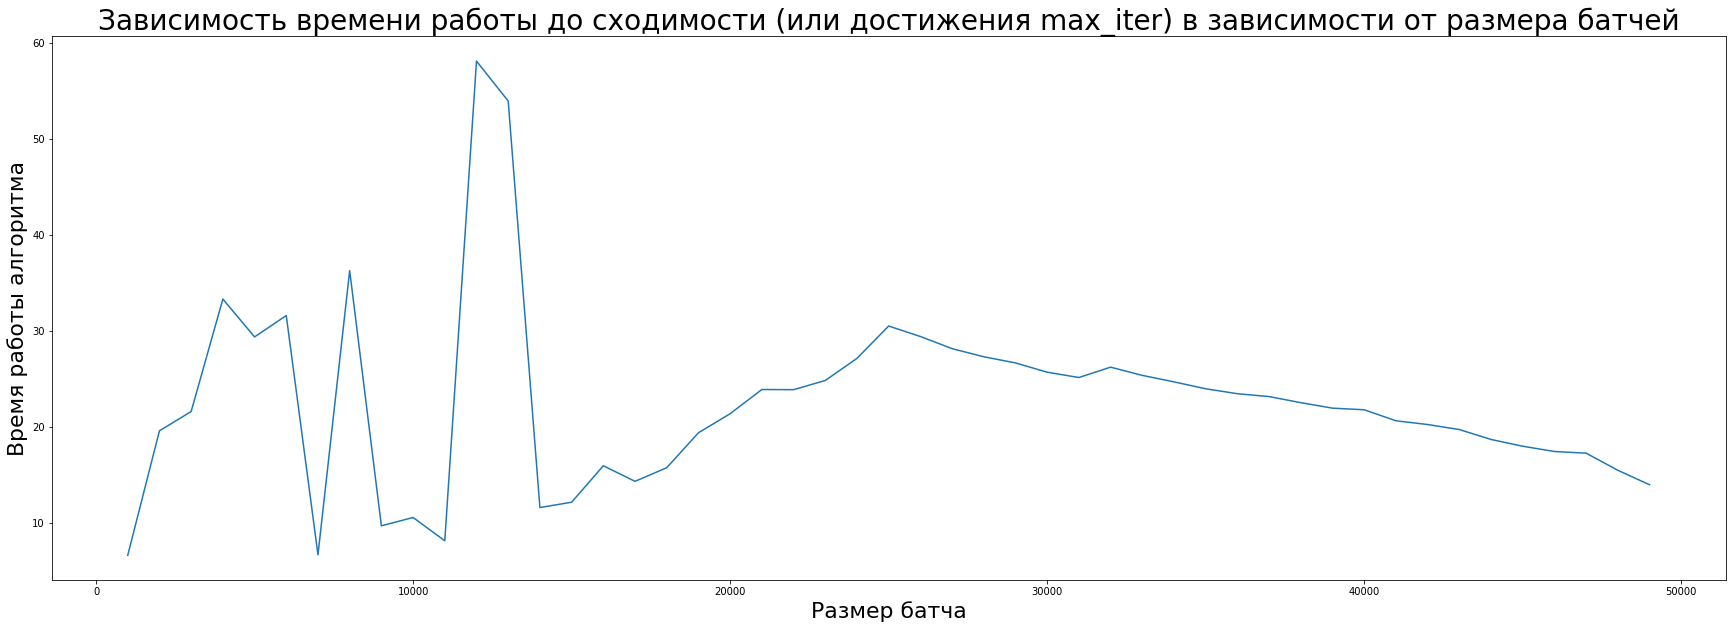

In [40]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.arange(1, 50) * 1000, times)
plt.title("Зависимость времени работы до сходимости (или достижения max_iter) в зависимости от размера батчей", fontsize=28)
plt.xlabel("Размер батча", fontsize=22)
plt.ylabel("Время работы алгоритма", fontsize=22)

plt.savefig("Images/sgd_batch_time.png")

plt.show()

In [43]:
(np.argmax(accuracy_batch) + 1) * 1000

8000

In [45]:
data_alpha_2 = parallel(delayed(launch_SGDC)(data_system, 8000, x/10, 0, 200, True) for x in range(1, 51))

In [46]:
holder_alpha = [item[0] for item in data_alpha_2]
results_alpha = [item[1] for item in data_alpha_2]

In [48]:
accuracy_alpha = [accuracy_score(test_target, result) for result in results_alpha]

In [49]:
max(accuracy_alpha), np.argmax(accuracy_alpha) + 1

(0.8677210292126136, 34)

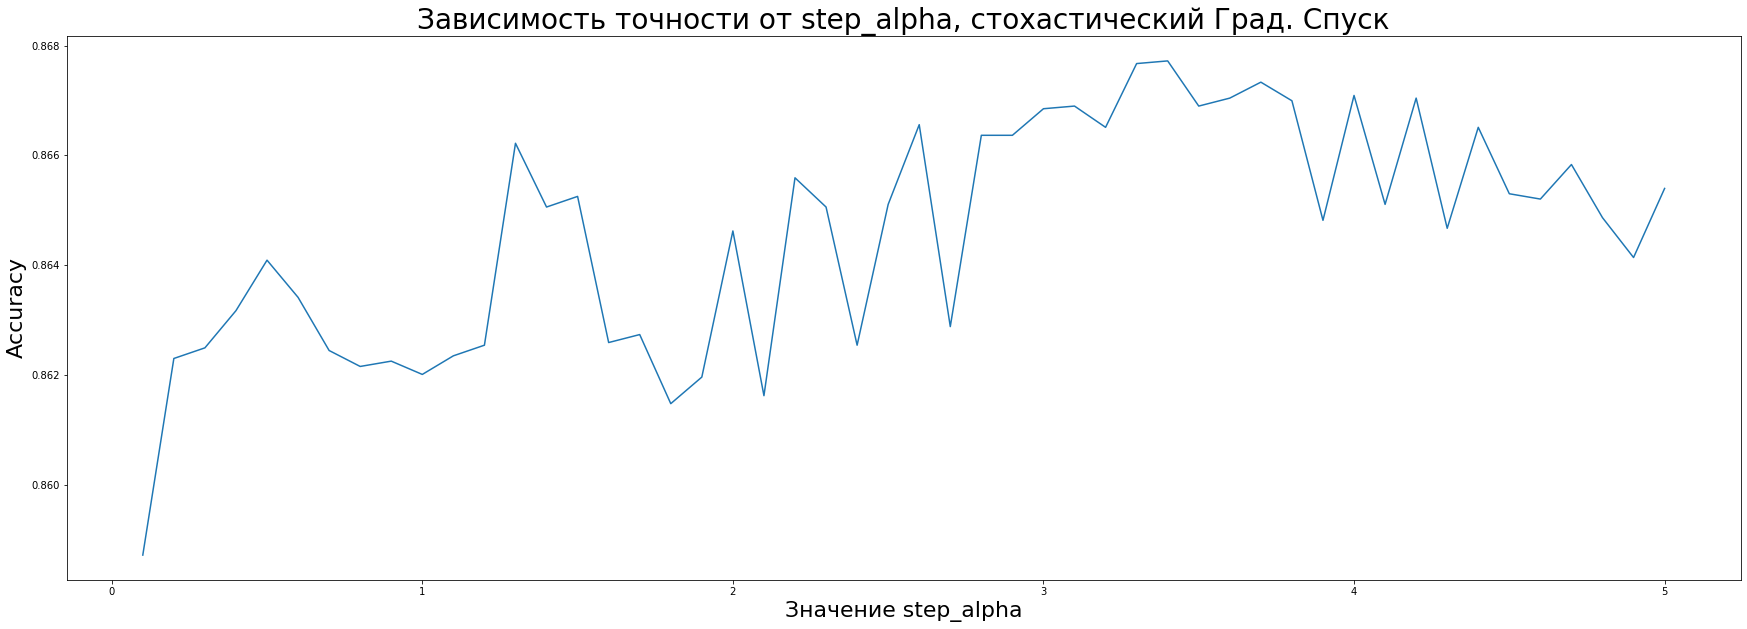

In [50]:
fig = plt.figure(figsize=[30,10])

plt.plot(np.arange(1,51) * 0.1, accuracy_alpha)
plt.title("Зависимость точности от step_alpha, стохастический Град. Спуск", fontsize=28)
plt.xlabel("Значение step_alpha", fontsize=22)
plt.ylabel("Accuracy", fontsize=22)

plt.savefig("Images/sgd_step_alpha_val_acc.png")

plt.show()

In [52]:
np.argmax(accuracy_alpha), max(accuracy_alpha)

(33, 0.8677210292126136)

In [53]:
time_34 = np.cumsum(holder_alpha[33]['time'])
func_34 = holder_alpha[33]['func']

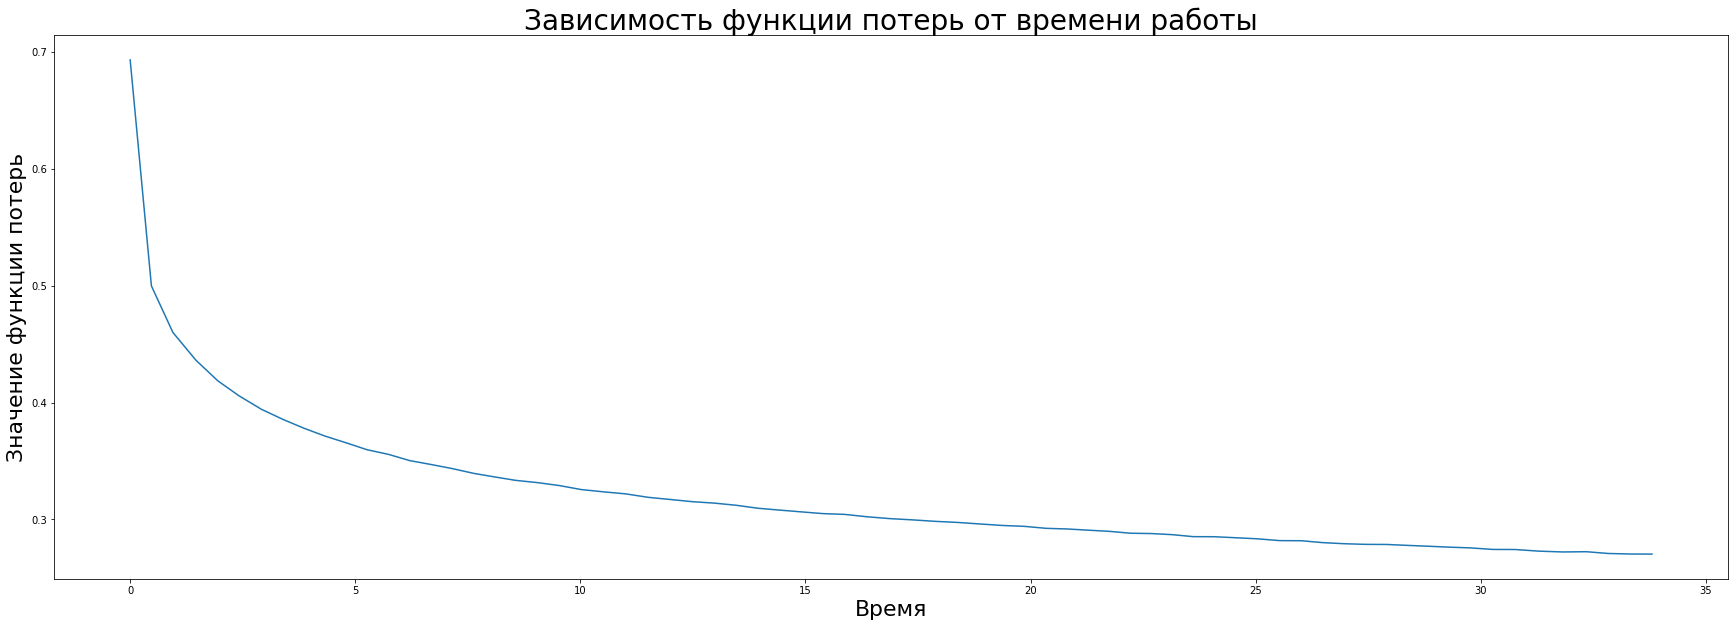

In [54]:
fig = plt.figure(figsize=[30, 10])

plt.plot(time_34, func_34)
plt.title("Зависимость функции потерь от времени работы", fontsize=28)
plt.xlabel("Время", fontsize = 22)
plt.ylabel("Значение функции потерь", fontsize = 22)

plt.savefig("Images/sgd_step_alpha_err_time.png")

plt.show()

In [55]:
epoch_26 = holder_alpha[33]['epoch_num']

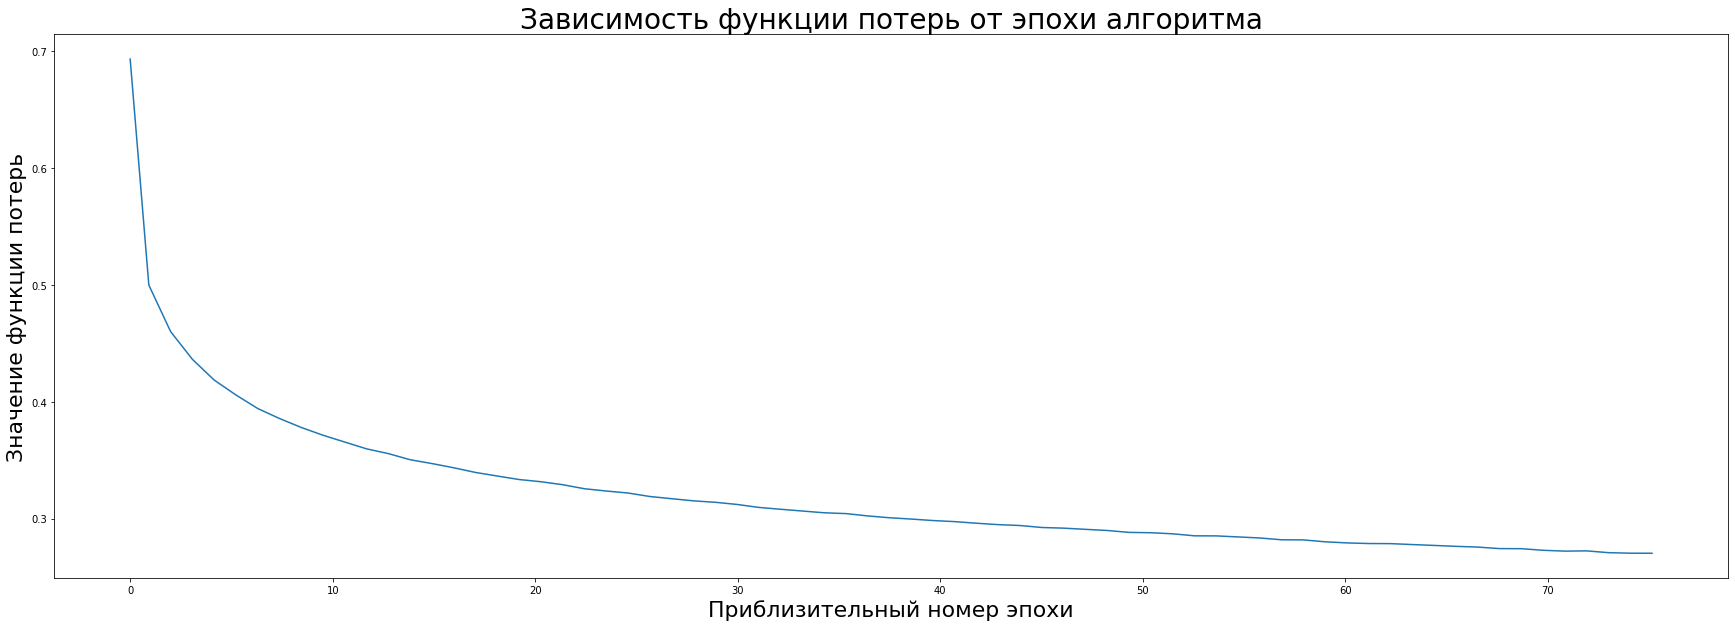

In [56]:
fig = plt.figure(figsize=[30, 10])

plt.plot(epoch_26, func_34)
plt.title("Зависимость функции потерь от эпохи алгоритма", fontsize = 28)
plt.xlabel("Приблизительный номер эпохи", fontsize=22)
plt.ylabel("Значение функции потерь", fontsize=22)

plt.savefig("Images/sgd_step_alpha_err_epoch.png")

plt.show()

In [57]:
holder = launch_SGDC(data_system, batch_size = 8000, step_alpha = 3.4, step_beta = 0, max_iter = 1000, trace = True, w_0 = None)

In [58]:
times = np.cumsum(holder[0]['time'])
ws = holder[0]['weights']

In [59]:
results_opt_a = [predict(test_matrix, w) for w in ws]

In [60]:
acc = [accuracy_score(test_target, item) for item in results_opt_a]

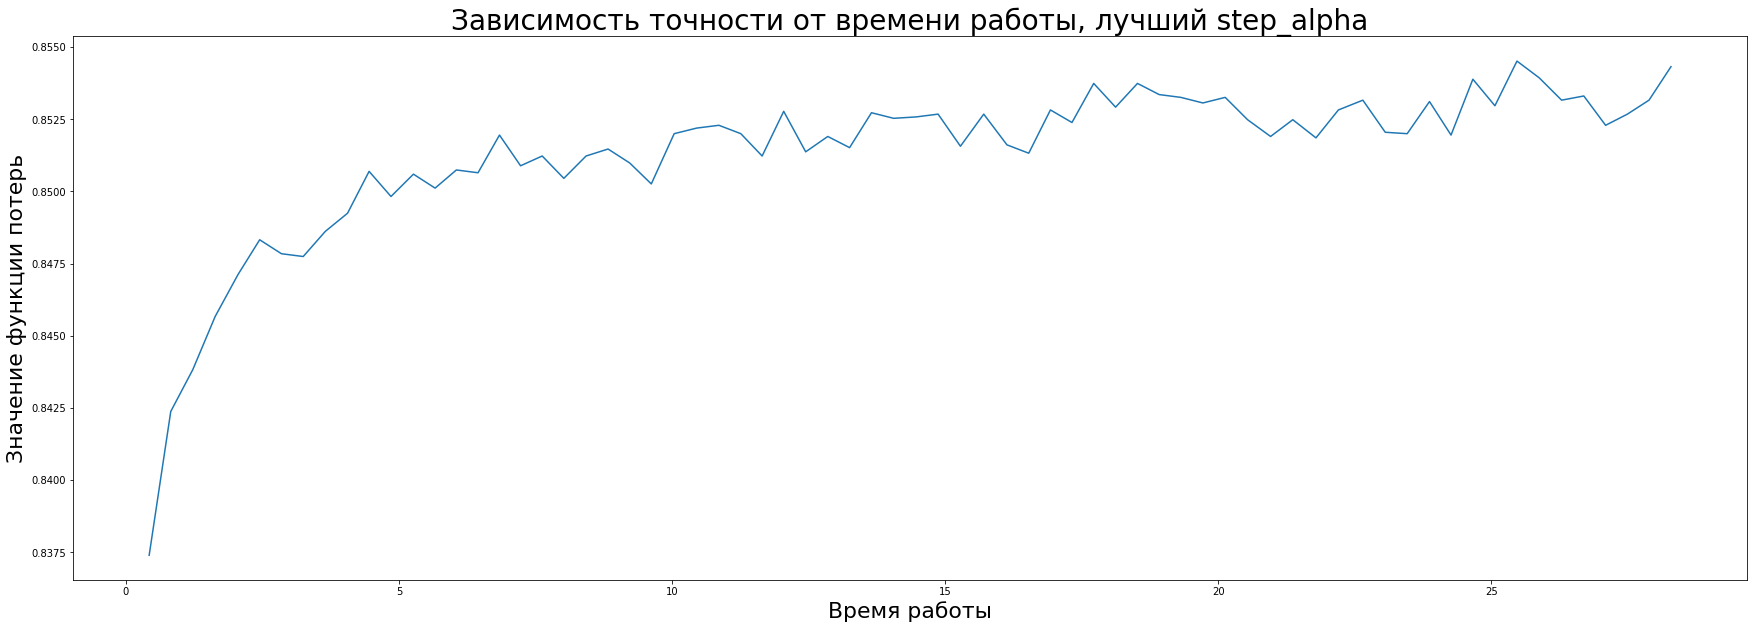

In [61]:
fig = plt.figure(figsize=[30, 10])

plt.plot(times[1:], acc[1:])
plt.title("Зависимость точности от времени работы, лучший step_alpha", fontsize = 28)
plt.xlabel("Время работы", fontsize = 22)
plt.ylabel("Значение функции потерь", fontsize = 22)
 
plt.savefig("Images/sgd_step_alpha_acc_time.png")

plt.show()

In [62]:
epoch = holder[0]['epoch_num']

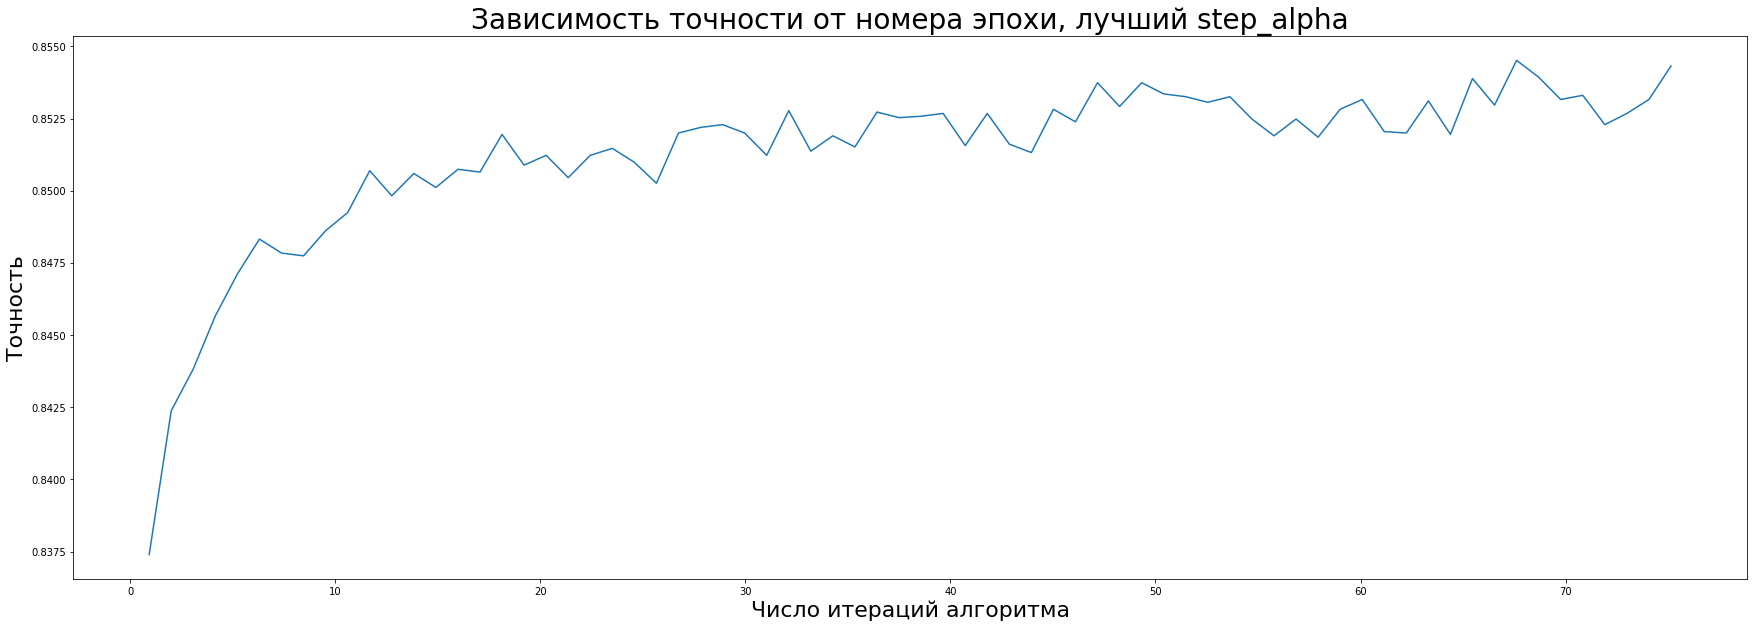

In [63]:
fig = plt.figure(figsize=[30, 10])

plt.plot(epoch[1:], acc[1:])
plt.title("Зависимость точности от номера эпохи, лучший step_alpha", fontsize=28)
plt.xlabel("Число итераций алгоритма", fontsize=22)
plt.ylabel("Точность", fontsize=22)

plt.savefig("Images/sgd_step_alpha_acc_iter.png")

plt.show()

Рассмотрим оценку step_beta

In [65]:
holder_mass_beta = parallel(delayed(launch_SGDC)(data_system, batch_size = 8000, 
                                                 step_alpha = 3.4,
                                                 step_beta = x/10, 
                                                 max_iter = 200, 
                                                 trace = True, 
                                                 w_0 = None) for x in range(50))

In [66]:
holder_beta = [holder_mass_beta[i][0] for i in range(50)]
res_beta = [holder_mass_beta[i][1] for i in range(50)]

In [67]:
accuracy_beta = [accuracy_score(test_target, res) for res in res_beta]

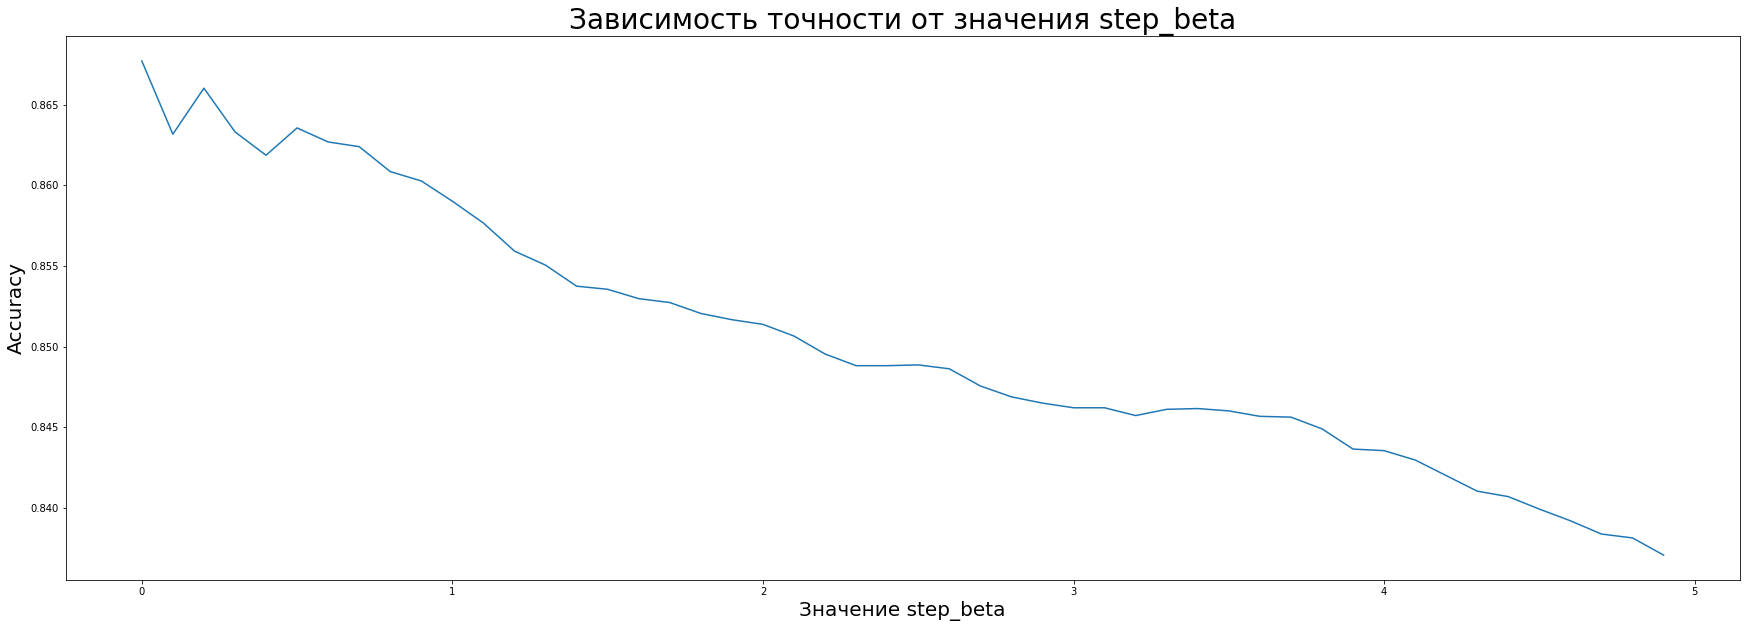

In [79]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.arange(0, 50) * 0.1, accuracy_beta)
plt.title("Зависимость точности от значения step_beta", fontsize=28)
plt.xlabel("Значение step_beta", fontsize=20)
plt.ylabel("Accuracy",fontsize=20)

plt.savefig("Images/sgd_step_beta_acc.png")

plt.show()

Т.к. точность падает при увеличении step_beta, для различия в графиках возьмём случайное значение step_beta, например - 1.7

In [69]:
w_list = holder_beta[14]['weights']

In [70]:
predicts_beta = [predict(test_matrix, item) for item in w_list]

In [71]:
acc_b = [accuracy_score(test_target, val) for val in predicts_beta]

In [72]:
times = np.cumsum(holder_beta[14]['time'])

In [73]:
acc_b.__len__()

69

In [74]:
func_b = holder_beta[14]['func']
epoch_b = holder_beta[14]['epoch_num']

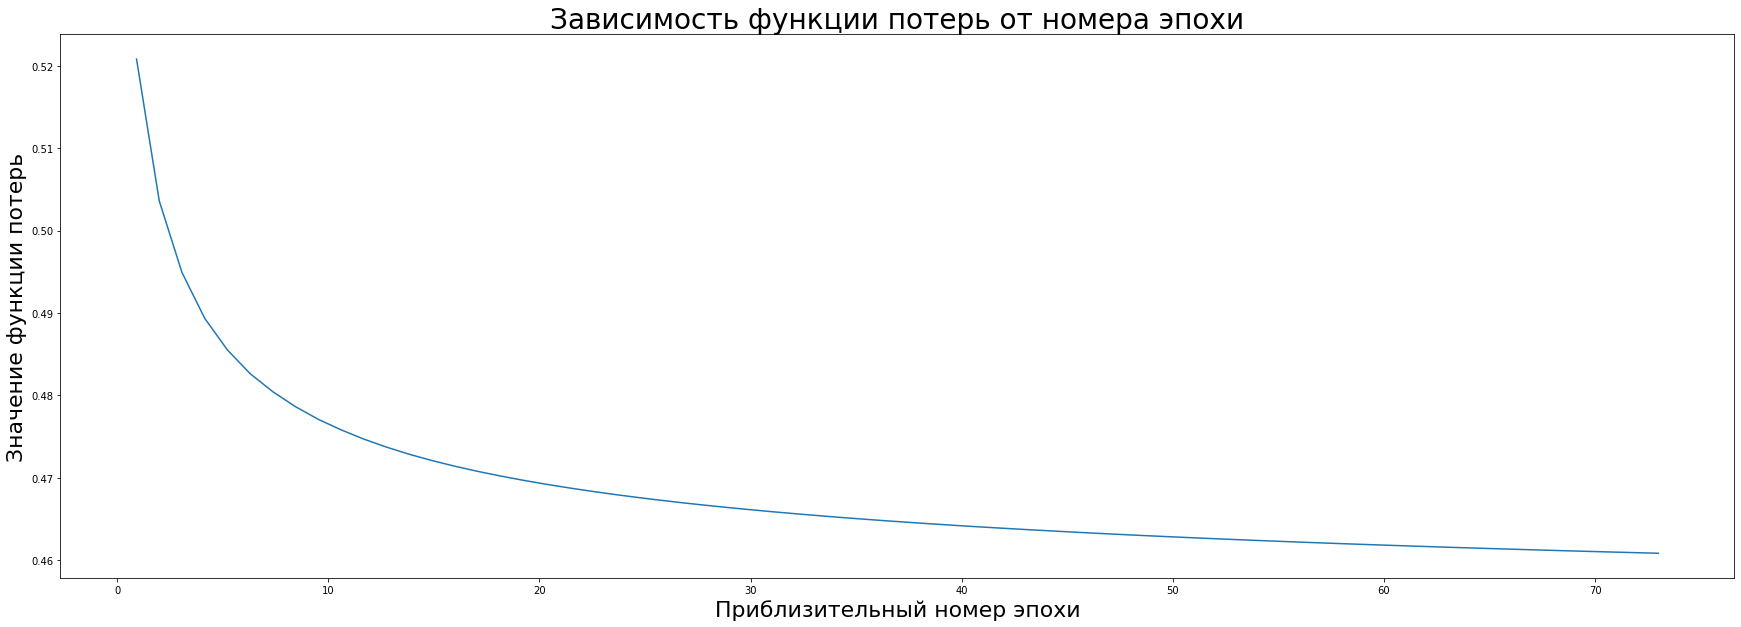

In [75]:
fig = plt.figure(figsize=[30, 10])

plt.plot(epoch_b[1:], func_b[1:])
plt.title("Зависимость функции потерь от номера эпохи", fontsize = 28)
plt.xlabel("Приблизительный номер эпохи", fontsize = 22)
plt.ylabel("Значение функции потерь", fontsize = 22)
 
plt.savefig("Images/sgd_step_beta_func_epoch.png")

plt.show()

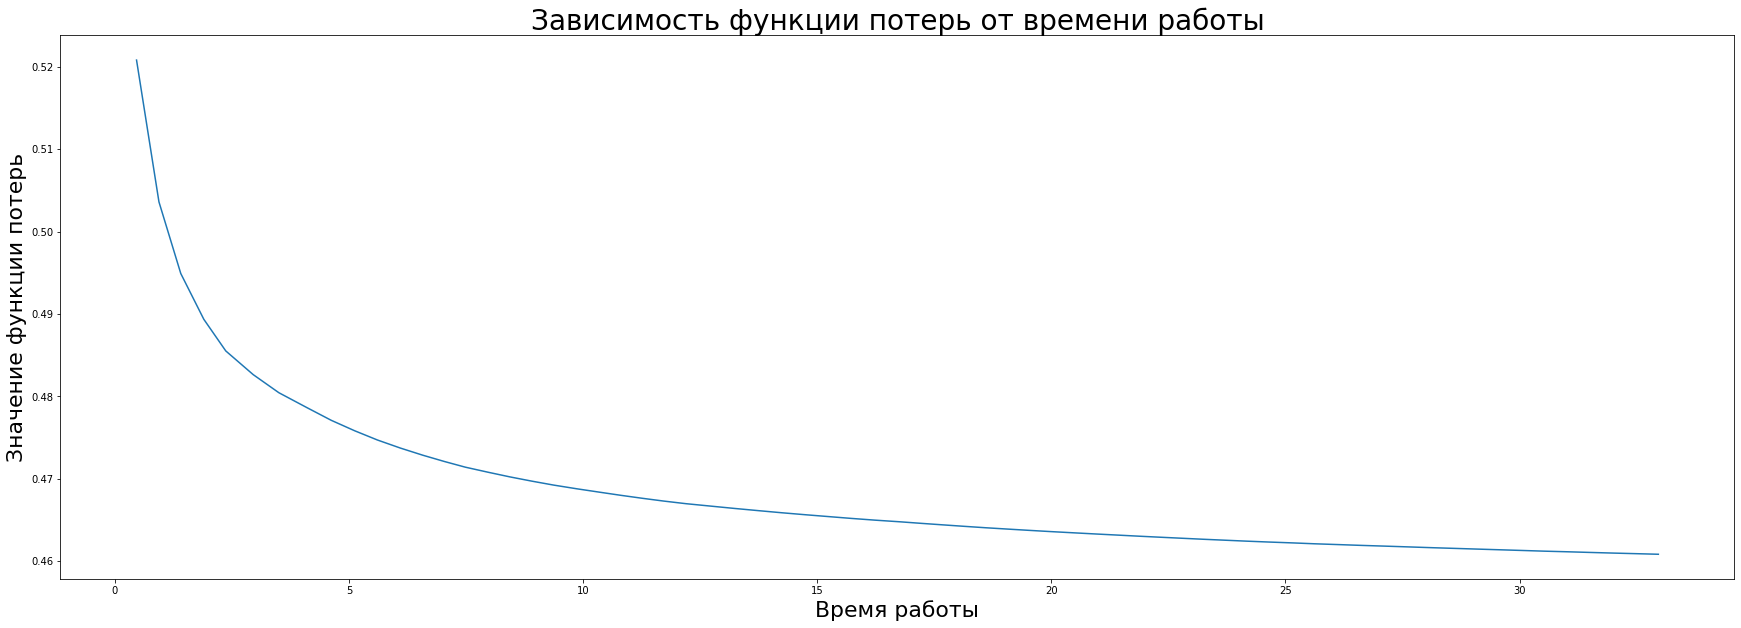

In [76]:
fig = plt.figure(figsize=[30, 10])

plt.plot(times[1:], func_b[1:])
plt.title("Зависимость функции потерь от времени работы", fontsize = 28)
plt.xlabel("Время работы", fontsize = 22)
plt.ylabel("Значение функции потерь", fontsize = 22)
 
plt.savefig("Images/sgd_step_beta_func_time.png")

plt.show()

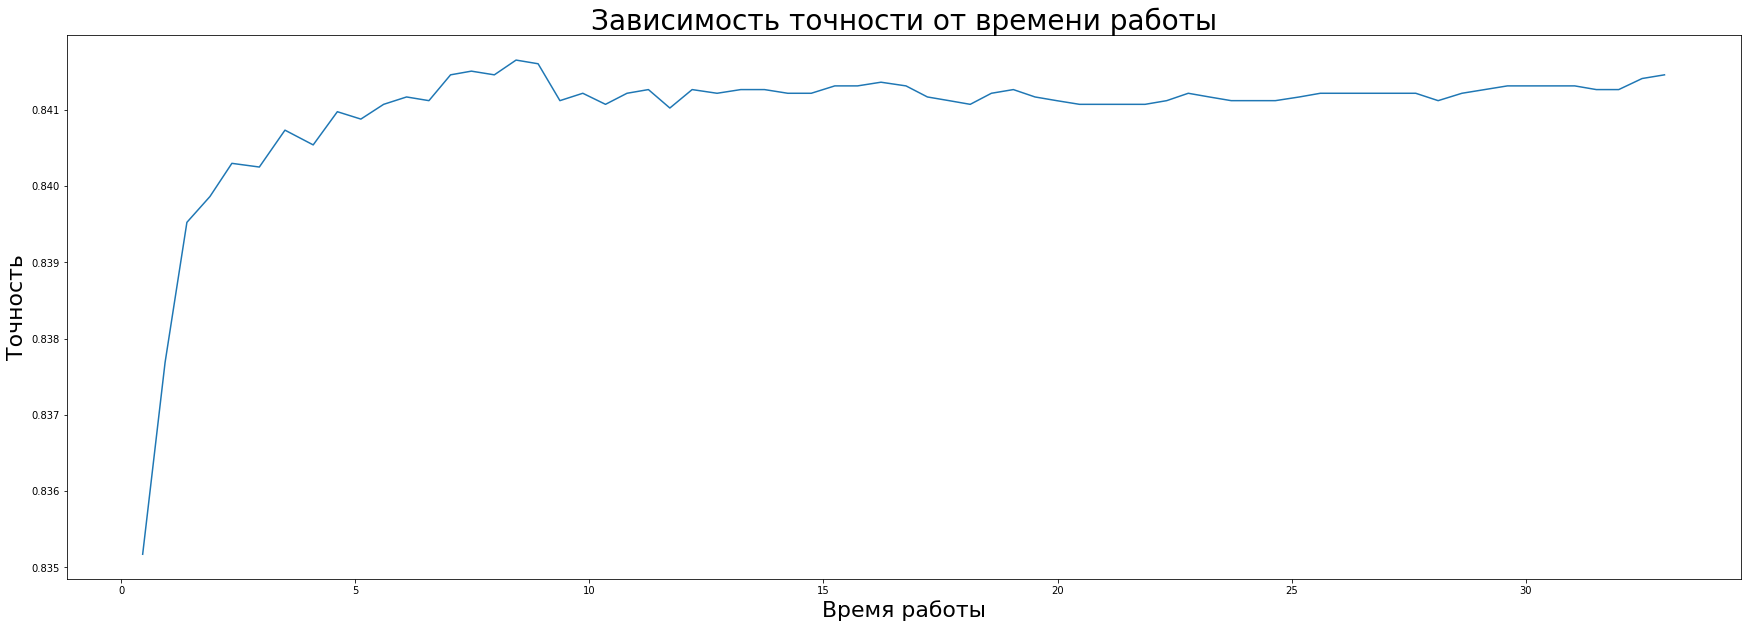

In [77]:
fig = plt.figure(figsize=[30, 10])

plt.plot(times[1:], acc_b[1:])
plt.title("Зависимость точности от времени работы", fontsize = 28)
plt.xlabel("Время работы", fontsize = 22)
plt.ylabel("Точность", fontsize = 22)
 
plt.savefig("Images/sgd_step_beta_acc_time.png")

plt.show()

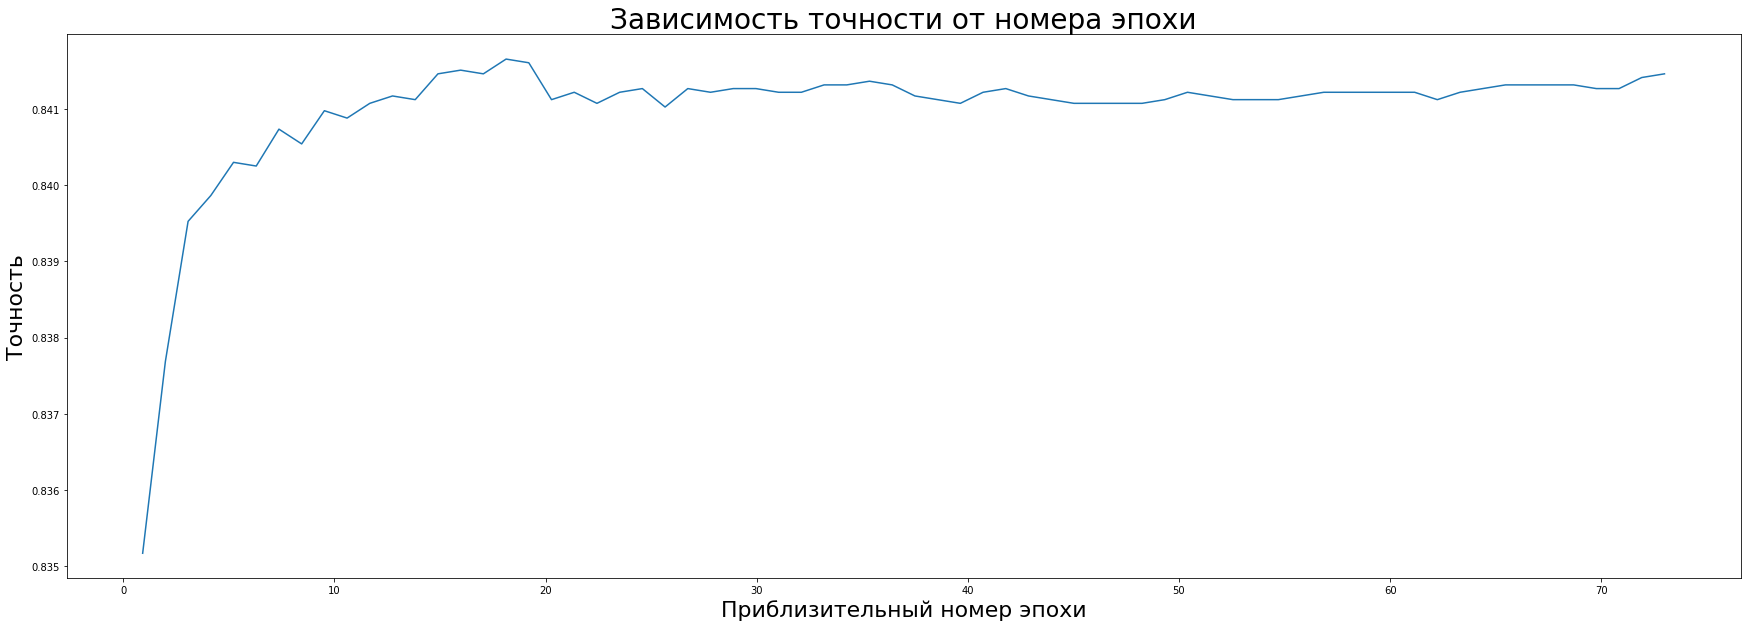

In [78]:
fig = plt.figure(figsize=[30, 10])

plt.plot(epoch_b[1:], acc_b[1:])
plt.title("Зависимость точности от номера эпохи", fontsize=28)
plt.xlabel("Приблизительный номер эпохи", fontsize=22)
plt.ylabel("Точность", fontsize=22)

plt.savefig("Images/sgd_step_beta_acc_epoch.png")

plt.show()

Как видно, последние 2 графика опять примерно одинаковы

In [80]:
from time import time

In [97]:
w = np.zeros(train_matrix.shape[1])
res_w = []
w_s = []
times_w = []
for k in range(200):
    time_now = time()
    classifier = SGDClassifier(batch_size = 8000, step_alpha = 3.4, max_iter = 200, l2_coef = 0)
    classifier.fit(train_matrix, train_target, w_0 = w)
    res_w.append(classifier.predict(test_matrix))
    w = classifier.get_weights()
    w_s.append(w)
    times_w.append(time() - time_now)

In [98]:
accuracy_w = [accuracy_score(test_target, res) for res in res_w]

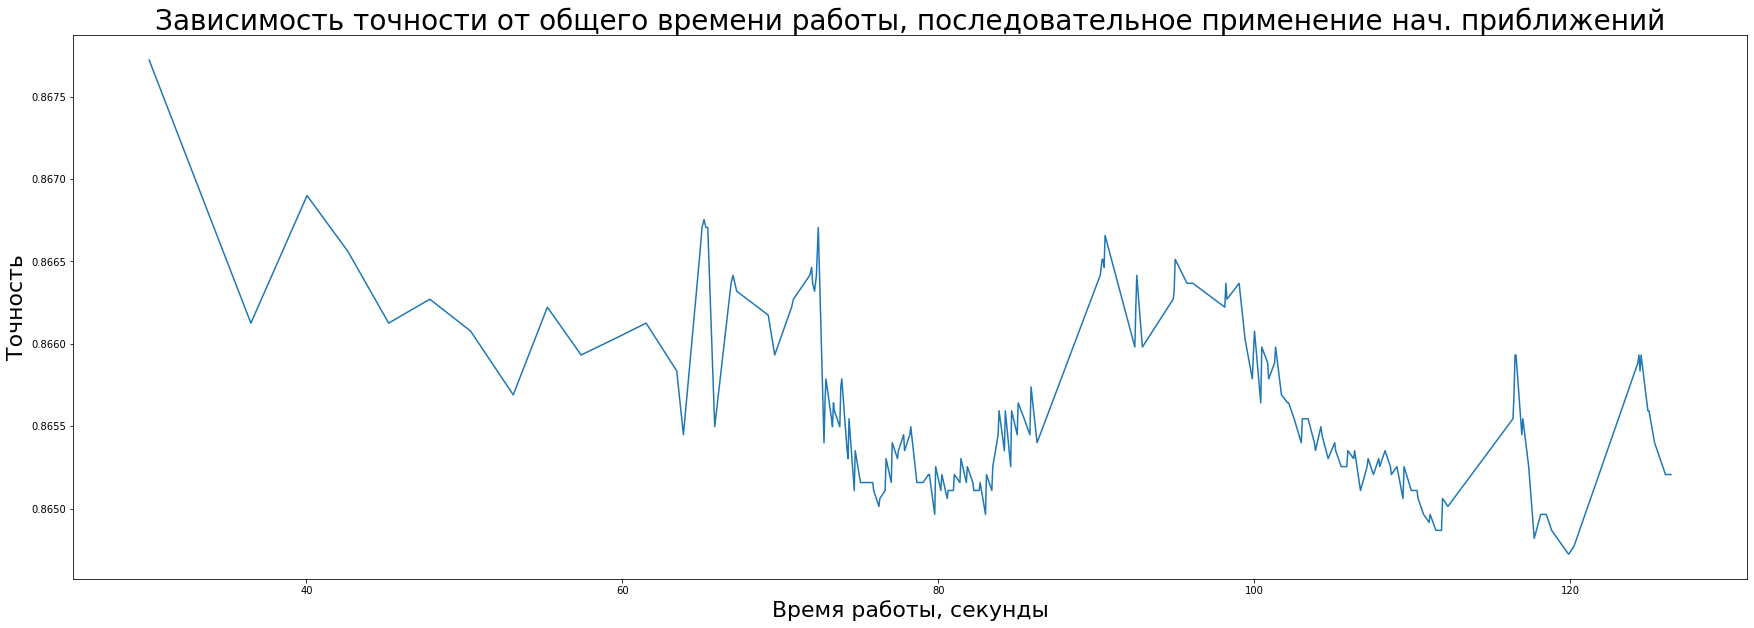

In [99]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.cumsum(times_w), accuracy_w)
plt.title("Зависимость точности от общего времени работы, последовательное применение нач. приближений", fontsize=28)
plt.xlabel("Время работы, секунды", fontsize=22)
plt.ylabel("Точность", fontsize=22)

plt.savefig("Images/sgd_start_closure_time.png")

plt.show()

In [100]:
from oracles import BinaryLogistic

In [101]:
oracle = BinaryLogistic()

In [102]:
loss_f = [oracle.func(train_matrix, train_target, w) for w in w_s]

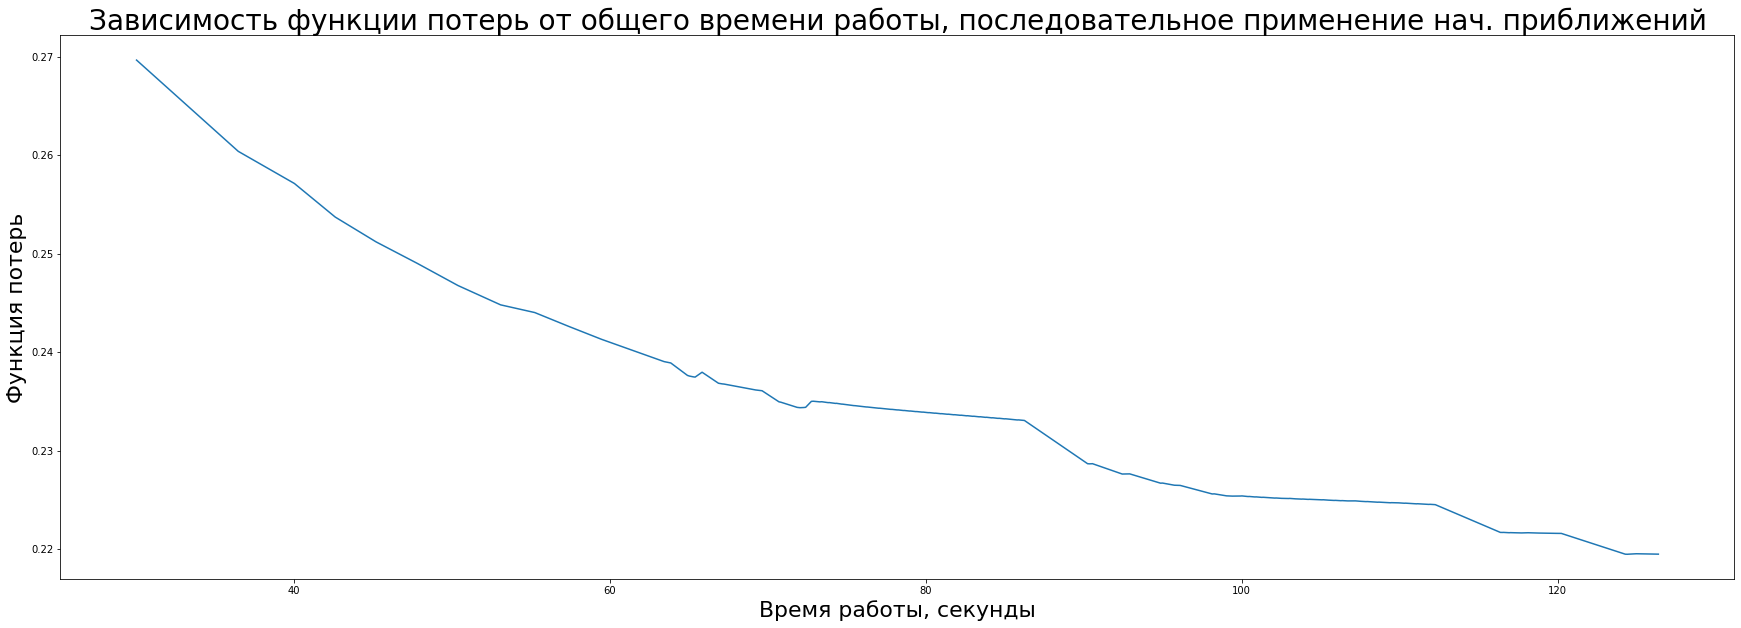

In [103]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.cumsum(times_w), loss_f)
plt.title("Зависимость функции потерь от общего времени работы, последовательное применение нач. приближений", fontsize=28)
plt.xlabel("Время работы, секунды", fontsize = 22)
plt.ylabel("Функция потерь", fontsize = 22)

plt.savefig("Images/sgd_start_closure_func.png")

plt.show()

In [104]:
max(accuracy_w)

0.8677210292126136